In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
html = '''<ul class="restaurants-list__container" aria-label="Restaurantes e mercados"><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/nosso-quintal-pirapora/7c1263d3-1424-46d3-9ad3-99698de691a1"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/7c1263d3-1424-46d3-9ad3-99698de691a1/202001311855_Dn3b_i.png" alt="Nosso Quintal" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Nosso Quintal</span></div><div class="restaurant-card__info">Brasileira</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/peg-pag-paes--doces-centro/bf419a0d-2b80-49da-be61-4b9b0d0db577"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/bf419a0d-2b80-49da-be61-4b9b0d0db577/202005031334_jFIJ_i.jpg" alt="Peg Pag Pães &amp; Doces" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Peg Pag Pães &amp; Doces</span></div><div class="restaurant-card__info">Padaria</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/uata--castanhal-estrela/4fdb27a2-cd66-4e3b-965d-acb6416f5f17"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/4fdb27a2-cd66-4e3b-965d-acb6416f5f17/202010051335_ym0i_i.jpg" alt="Uata?! Castanhal" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Uata?! Castanhal</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/temakeiro-sushi-estrela/97e9eabc-cac5-4d95-aabb-bc31360c5fbd"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/97e9eabc-cac5-4d95-aabb-bc31360c5fbd/201905252055_mB46_i.jpg" alt="Temakeiro Sushi" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Temakeiro Sushi</span></div><div class="restaurant-card__info">Japonesa</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/chiquinho-sorvetes---castanhal-01-estrela/ccc3c4e4-6943-4a6b-92ba-81c4e15ba06c"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/201902071400_ccc3c4e4-6943-4a6b-92ba-81c4e15ba06c.png" alt="Chiquinho Sorvetes - Castanhal 01" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Chiquinho Sorvetes - Castanhal 01</span></div><div class="restaurant-card__info">Sorvetes</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/hot-pastelaria-estrela/1ae9454e-7cdb-4c90-b181-79d630cd0c51"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/1ae9454e-7cdb-4c90-b181-79d630cd0c51/202101281323_VrB4_i.jpg" alt="Hot Pastelaria" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Hot Pastelaria</span></div><div class="restaurant-card__info">Pastel</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/restaurante-egua-do-tempero-estrela/20f1ea81-728d-40b5-a508-53a5492ab3e2"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/20f1ea81-728d-40b5-a508-53a5492ab3e2/202003301748_ruUU_.jpeg" alt="Restaurante Egua do Tempero" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Restaurante Egua do Tempero</span></div><div class="restaurant-card__info">Brasileira</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/la-burgueria-delivery-estrela/5e07c31c-e9b6-4575-b156-0b17b624be42"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/5e07c31c-e9b6-4575-b156-0b17b624be42/201907191345_LQlC_i.jpg" alt="Lá Burgueria Delivery" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Lá Burgueria Delivery</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/lanche-matriz-centro/809c21d4-56ca-4c1e-8396-58850a0e322a"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/809c21d4-56ca-4c1e-8396-58850a0e322a/202005151855_w8lI_.jpeg" alt="Lanche Matriz" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Lanche Matriz</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/mais-acai-estrela/bb9ec9cc-8fcb-4e99-b970-88179789bda9"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/bb9ec9cc-8fcb-4e99-b970-88179789bda9/201908200833_WbND_.jpeg" alt="Mais Açaí" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Mais Açaí</span></div><div class="restaurant-card__info">Açaí</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/teppan-yakisoba-santa-lidia/9000c43d-a5a5-4494-969e-0eab53371e46"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/9000c43d-a5a5-4494-969e-0eab53371e46/202001031330_QZGz_i.jpg" alt="Teppan Yakisoba" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Teppan Yakisoba</span></div><div class="restaurant-card__info">Japonesa</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/bkb-hamburgueria-caicara/c7b118fb-fbd8-437a-80d3-08cc382fc7d3"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/201908281914_c7b118fb-fbd8-437a-80d3-08cc382fc7d3.png" alt="Bkb Hamburgueria" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Bkb Hamburgueria</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/seven-comidas-tipicas-caicara/0b5c5d2f-6e0e-492f-a6c9-d4e7bdf070d9"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/201910291941_0b5c5d2f-6e0e-492f-a6c9-d4e7bdf070d9.png" alt="Seven Comidas Típicas" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Seven Comidas Típicas</span></div><div class="restaurant-card__info">Brasileira</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/gran-cheff-pizzaria-caicara/cfb367ff-1ba6-443d-b4bd-5ab8f2156a38"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/cfb367ff-1ba6-443d-b4bd-5ab8f2156a38/202102281438_OPA0_.jpeg" alt="Gran Cheff Pizzaria" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Gran Cheff Pizzaria</span></div><div class="restaurant-card__info">Pizza</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/churrascaria-o-frango-assado-na-brasa-caicara/25448d15-d6b5-4207-8b9d-21ca23a8c645"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/202002042225_25448d15-d6b5-4207-8b9d-21ca23a8c645.jpg" alt="Churrascaria o Frango Assado na Brasa" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Churrascaria o Frango Assado na Brasa</span></div><div class="restaurant-card__info">Carnes</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/beto-sushi-delivery-saudade-i/c3132c37-6ba6-4f9a-923f-cd72b357422d"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/c3132c37-6ba6-4f9a-923f-cd72b357422d/201908221339_NF7G_i.jpg" alt="Beto Sushi Delivery" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Beto Sushi Delivery</span></div><div class="restaurant-card__info">Japonesa</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/irons-hamburgueria-e-esfiharia--estrela/04c709b0-7248-4419-8b35-b6ea6047f0ca"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/04c709b0-7248-4419-8b35-b6ea6047f0ca/202002011339_dsma_i.jpg" alt="Iron`s Hamburgueria e Esfiharia !" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Iron`s Hamburgueria e Esfiharia !</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/gutchan-burgers-caicara/f743e89b-7aa6-4d5b-808e-97b82341bdbe"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/f743e89b-7aa6-4d5b-808e-97b82341bdbe/202011021837_ShOF_i.png" alt="Gutchan Burgers" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Gutchan Burgers</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/leo-pizzas-e-massas-novo-olinda/114dab33-34f5-45d2-b4de-f2dafbe1ab34"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/201906281204_114dab33-34f5-45d2-b4de-f2dafbe1ab34.png" alt="Leo Pizzas e Massas" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Leo Pizzas e Massas</span></div><div class="restaurant-card__info">Pizza</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/poker-burger-caicara/932ec05c-729d-40b6-bb41-23b626aed1c1"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/932ec05c-729d-40b6-bb41-23b626aed1c1/202007172027_P5GE_.jpeg" alt="Poker Burger" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Poker Burger</span></div><div class="restaurant-card__info">Hambúrguer</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/xpresso-sushi-santa-lidia/3d90e350-97da-4860-a524-bcdc0fd37f76"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/3d90e350-97da-4860-a524-bcdc0fd37f76/202102100428_j4Q8_i.jpg" alt="Xpresso Sushi" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Xpresso Sushi</span></div><div class="restaurant-card__info">Japonesa</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/peps-brasa-pirapora/194053a8-4617-4ddb-82f2-2498dff48cb3"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/201904111826_194053a8-4617-4ddb-82f2-2498dff48cb3.png" alt="Peps Brasa" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Peps Brasa</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/super-combo-caicara/bda4f7ae-6a72-44d1-bfd9-419f1f3a51c4"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/bda4f7ae-6a72-44d1-bfd9-419f1f3a51c4/202004172334_59iX_i.jpg" alt="Super Combo" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Super Combo</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/pizzaria-estrela-imperador/210e5ce9-9283-40f5-a420-4ba6e4ca5ad6"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/210e5ce9-9283-40f5-a420-4ba6e4ca5ad6/201908011528_DrtI_i.png" alt="Pizzaria Estrela" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Pizzaria Estrela</span></div><div class="restaurant-card__info">Pizza</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/delivery-mamae-quero-mais-centro/aeaa153d-e04d-4041-8db6-656ef9f176c1"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/aeaa153d-e04d-4041-8db6-656ef9f176c1/201906111749_gXJV_i.png" alt="Delivery Mamãe Quero Mais" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Delivery Mamãe Quero Mais</span></div><div class="restaurant-card__info">Marmita</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/chefs-buguers-ianetama/8d7b9d0c-cb3e-4b81-824b-1704d992b847"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/8d7b9d0c-cb3e-4b81-824b-1704d992b847/201906201852_PPQt_i.png" alt="Chefs Buguers" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Chefs Buguers</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/icebode-castanhal-centro/cc767066-6121-44d7-abdf-0c5f8f15efb4"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/cc767066-6121-44d7-abdf-0c5f8f15efb4/202006221212_FgHc_i.png" alt="Icebode Castanhal" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Icebode Castanhal</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/delivery-top-dez-saudade-i/0563a1b4-4d3c-4770-88bb-39fda01e3b42"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/0563a1b4-4d3c-4770-88bb-39fda01e3b42/201909231854_H4Br_i.png" alt="Delivery Top Dez" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Delivery Top Dez</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/vilany-lanches-caicara/8958d532-d93e-4bf1-9680-4a8d2c5c668d"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/8958d532-d93e-4bf1-9680-4a8d2c5c668d/202007071612_dDGh_i.jpg" alt="Vilany Lanches" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Vilany Lanches</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/frutmix-centro/f4e78d31-554e-47de-aec1-64ea0070b85d"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/201810091141_f4e78d31-554e-47de-aec1-64ea0070b85d.png" alt="Frutmix" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Frutmix</span></div><div class="restaurant-card__info">Sorvetes</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/la-boca-pizzaria-estrela/4028936f-0514-4483-9af8-c654e2f758fd"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/4028936f-0514-4483-9af8-c654e2f758fd/202005111621_3jXm_.jpeg" alt="La Boca Pizzaria" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">La Boca Pizzaria</span></div><div class="restaurant-card__info">Pizza</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/o-maquinista-centro/4325ccd2-b736-45e0-bd12-252399a53f96"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/4325ccd2-b736-45e0-bd12-252399a53f96/202102221523_BVrL_i.png" alt="O Maquinista" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">O Maquinista</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/super-pizza-delivery-estrela/ba9648a2-acfd-440e-b54f-a5c14da94ca3"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/ba9648a2-acfd-440e-b54f-a5c14da94ca3/202103012235_jws0_i.png" alt="Super Pizza Delivery" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Super Pizza Delivery</span></div><div class="restaurant-card__info">Pizza</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/hamburgueria-araujo-saudade-i/be4c1f53-2353-4416-877e-a6c516711f17"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/be4c1f53-2353-4416-877e-a6c516711f17/202001291127_FVjO_.jpeg" alt="Hamburgueria Araújo" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Hamburgueria Araújo</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/arroz-king-santa-lidia/bf95765e-4988-4f7f-90f1-b70bcc470997"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/bf95765e-4988-4f7f-90f1-b70bcc470997/202001311852_qNTi_.jpeg" alt="Arroz King" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Arroz King</span></div><div class="restaurant-card__info">Brasileira</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/quero-pizza-santa-catarina/40cd6dea-2af2-4927-b234-68cb7277ffe6"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/40cd6dea-2af2-4927-b234-68cb7277ffe6/202007101722_TwiJ_i.jpg" alt="Quero Pizza" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Quero Pizza</span></div><div class="restaurant-card__info">Pizza</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/acai-marechal-santa-catarina/a1e625ad-6678-4380-9621-465acdeb913f"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/a1e625ad-6678-4380-9621-465acdeb913f/201911031340_cDO7_i.jpg" alt="Açaí Marechal" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Açaí Marechal</span></div><div class="restaurant-card__info">Açaí</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/cacau-show----centro---castanhal-centro/ed871ef8-31aa-47c0-b7d9-70c4f7777b29"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/202007172010_ed871ef8-31aa-47c0-b7d9-70c4f7777b29.png" alt="Cacau Show -  Centro - Castanhal" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Cacau Show -  Centro - Castanhal</span></div><div class="restaurant-card__info">Doces &amp; Bolos</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/expresso-burger-centro/db82d60a-317c-44fb-b31c-0abef313bbe8"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/db82d60a-317c-44fb-b31c-0abef313bbe8/202002092055_2avb_i.png" alt="Expresso Burger" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Expresso Burger</span></div><div class="restaurant-card__info">Hambúrguer</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/dona-val-doceria-e-cafeteria-estrela/949eedd4-5535-4365-b9ca-a67419ade012"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/949eedd4-5535-4365-b9ca-a67419ade012/201910171129_9ZzT_i.jpg" alt="Dona Val Doceria e Cafeteria" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Dona Val Doceria e Cafeteria</span></div><div class="restaurant-card__info">Doces &amp; Bolos</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/acai-estilizado-saudade-i/736860f1-51d8-4662-aafa-36c857fa248d"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/736860f1-51d8-4662-aafa-36c857fa248d/201909271756_zWSd_.jpeg" alt="Acai Estilizado" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Acai Estilizado</span></div><div class="restaurant-card__info">Açaí</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/fit-express-imperador/e91131ca-8cc5-450d-92c8-1ac14ee4ca54"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/e91131ca-8cc5-450d-92c8-1ac14ee4ca54/202102202341_poRT_i.png" alt="Fit Express" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Fit Express</span></div><div class="restaurant-card__info">Saudável</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/cheiro-de-pizza-castanhal-caicara/d8d4885d-2b50-4812-9b8e-54ff724704dd"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/d8d4885d-2b50-4812-9b8e-54ff724704dd/202006251644_xBHU_i.jpg" alt="Cheiro de Pizza Castanhal" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Cheiro de Pizza Castanhal</span></div><div class="restaurant-card__info">Pizza</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/oca-acai-estrela/9389ef3a-5f6d-4c0f-bbdb-9150f0455ebe"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/9389ef3a-5f6d-4c0f-bbdb-9150f0455ebe/202001131050_wYC8_i.png" alt="Oca Acai" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Oca Acai</span></div><div class="restaurant-card__info">Açaí</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/garagem-burger-santa-lidia/169a7efd-59d0-4d6e-82c3-4df295541162"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/201906061158_169a7efd-59d0-4d6e-82c3-4df295541162.png" alt="Garagem Burger" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Garagem Burger</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/republica-2182-estrela/ce9782fa-d22c-4f5b-86fb-2a2be2961572"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/ce9782fa-d22c-4f5b-86fb-2a2be2961572/202011302253_7Kv6_i.jpg" alt="Republica 2182" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Republica 2182</span></div><div class="restaurant-card__info">Variada</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/delicias-de-mainha-caicara/5ed8a0f9-6071-45c3-8e18-8549151ac5d7"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/5ed8a0f9-6071-45c3-8e18-8549151ac5d7/202006090839_bl2C_i.jpg" alt="Delícias de Mainha" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Delícias de Mainha</span></div><div class="restaurant-card__info">Marmita</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/delicias-da-duda-saudade-i/400f4120-f906-44f1-b39f-74ec81d18b75"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/400f4120-f906-44f1-b39f-74ec81d18b75/202101242025_pI0M_i.jpg" alt="Delícias da Duda" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Delícias da Duda</span></div><div class="restaurant-card__info">Doces &amp; Bolos</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/brocao-delivery-jaderlandia/54173ed3-edfe-4215-8fc8-1462fd984283"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/201908091654_54173ed3-edfe-4215-8fc8-1462fd984283.png" alt="Brocão Delivery" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Brocão Delivery</span></div><div class="restaurant-card__info">Lanches</div></h3><div class="restaurant-card__footer"></div></div></a></li><li class="restaurants-list__item-wrapper"><a class="restaurant-card__link" tabindex="0" data-test-id="restaurant-item-link" href="/delivery/castanhal-pa/manu-doces-centro/d77ddb4f-56c6-4f28-879d-cdd95fb2f41d"><div class="restaurant-card"><div class="restaurant-card__figure"><img loading="lazy" src="https://static-images.ifood.com.br/image/upload/t_thumbnail/logosgde/d77ddb4f-56c6-4f28-879d-cdd95fb2f41d/202001011015_LTEz_i.jpg" alt="Manu Doces" class="restaurant-card__img-logo" crossorigin="anonymous"></div><h3 class="restaurant-card__title"><div class="restaurant-card__header"><span class="restaurant-name">Manu Doces</span></div><div class="restaurant-card__info">Doces &amp; Bolos</div></h3><div class="restaurant-card__footer"></div></div></a></li></ul>'''

In [ ]:
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())

In [ ]:
lista = soup.find_all('li', attrs={'class': 'restaurants-list__item-wrapper'})
print(lista)

In [ ]:
restaurantes = []
for restaurante in lista:
  restaurante_data = []
  restaurante_data.append(restaurante.span.text) #Nome do Restaurante
  restaurante_data.append(restaurante.find(name='div', attrs={'class': 'restaurant-card__info'}).text) #Tipo de Restaurante
  restaurante_data.append(restaurante.img['src'])
  restaurantes.append(restaurante_data)

restaurantes

In [ ]:
tabela = pd.DataFrame(restaurantes, columns=['Nome', 'Tipo', 'Logo'])
tabela

,Nome,Tipo,Logo
0,Nosso Quintal,Brasileira,https://static-images.ifood.com.br/image/uploa...
1,Peg Pag Pães & Doces,Padaria,https://static-images.ifood.com.br/image/uploa...
2,Uata?! Castanhal,Lanches,https://static-images.ifood.com.br/image/uploa...
3,Temakeiro Sushi,Japonesa,https://static-images.ifood.com.br/image/uploa...
4,Chiquinho Sorvetes - Castanhal 01,Sorvetes,https://static-images.ifood.com.br/image/uploa...
5,Hot Pastelaria,Pastel,https://static-images.ifood.com.br/image/uploa...
6,Restaurante Egua do Tempero,Brasileira,https://static-images.ifood.com.br/image/uploa...
7,Lá Burgueria Delivery,Lanches,https://static-images.ifood.com.br/image/uploa...
8,Lanche Matriz,Lanches,https://static-images.ifood.com.br/image/uploa...
9,Mais Açaí,Açaí,https://static-images.ifood.com.br/image/uploa...


In [ ]:
tabela.value_counts().sum()

50

In [ ]:
tabela.to_excel('restaurantes.xlsx', sheet_name='castanhal-pa', index=False)

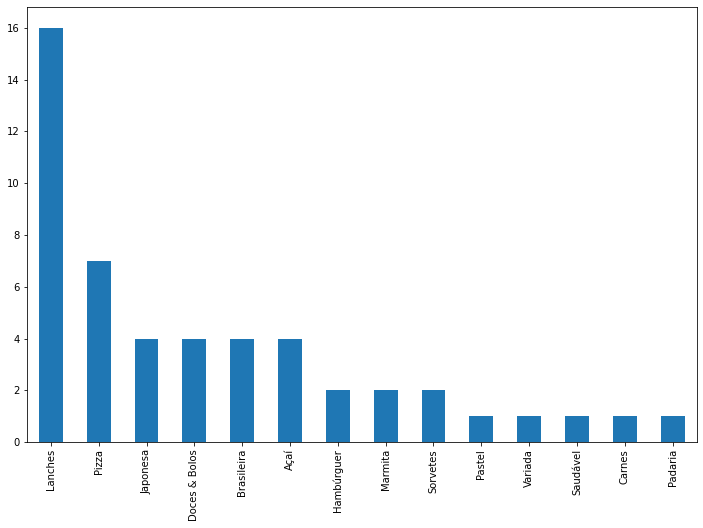

In [ ]:
plt.figure(figsize=(12, 8))
tabela['Tipo'].value_counts().plot.bar()